# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheter based on their medical attributes.

We're following to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is a also a version of it available on kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting wheter or not a patient has a heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

** Data Dictionary**

1. age (in years)
2. sex (1=male, 0=female)
3. cp: chest pain type
        0 typical angina: chest pain related decrease blood supply to the heart
        1 atypical angina: chest pain not related to heart
        2 non-anginal pain: typically esphageal spasms(non heart related)
        3 asymptomatic: chest pain not showing signes of disease
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results (values 0,1,2)
        0 normal
        1 having ST-T wave abnormality (T wave inversions and/or ST elevation
          or depression of > 0.05 mV)
        2 showing probable or definite left ventricular hypertrophy by Estes'
          criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        0 upsloping
        1 flat
        2 downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: have heart disease or not (1=yes, 0=no)

## Preparing the tools

We're going to use pandas, matplotlib, and NumPy for data analysis and manipulation


In [3]:
# Import all the tools that we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [5]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA)

The goal here is to find out more about the data and become subject matter expect on the dataset you're working it

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add change or remove features to get more out of your data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

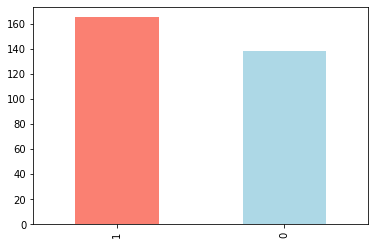

In [18]:

df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [22]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [23]:
# Compare target column with sex column
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

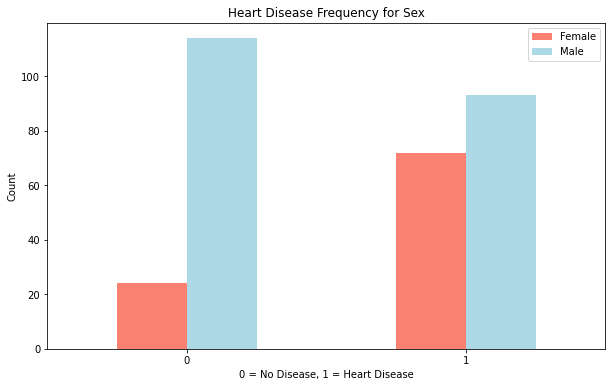

In [31]:
# Create a plot of crosstab
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",
                                         figsize=(10,6),
                                         color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Heart Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for heart disease

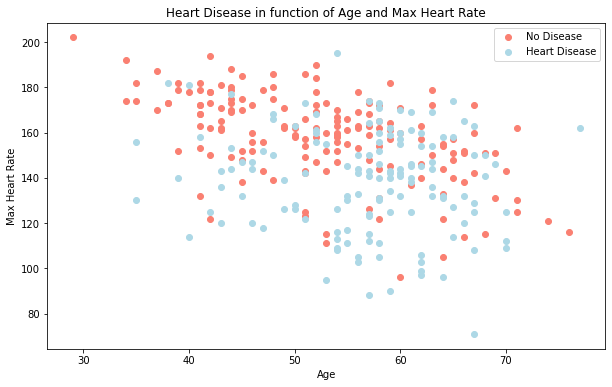

In [49]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["No Disease", "Heart Disease"]);

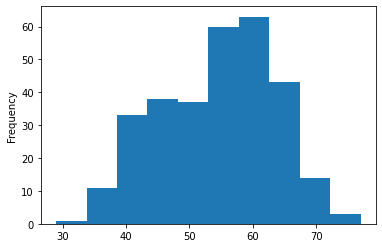

In [52]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

3. cp: chest pain type
        0 typical angina: chest pain related decrease blood supply to the heart
        1 atypical angina: chest pain not related to heart
        2 non-anginal pain: typically esphageal spasms(non heart related)
        3 asymptomatic: chest pain not showing signes of disease

In [56]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

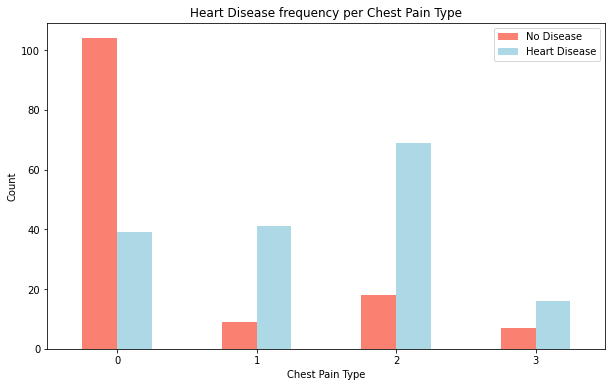

In [60]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=("salmon", "lightblue"))

# Add some communication
plt.title("Heart Disease frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Disease","Heart Disease"])
plt.xticks(rotation=0)

In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


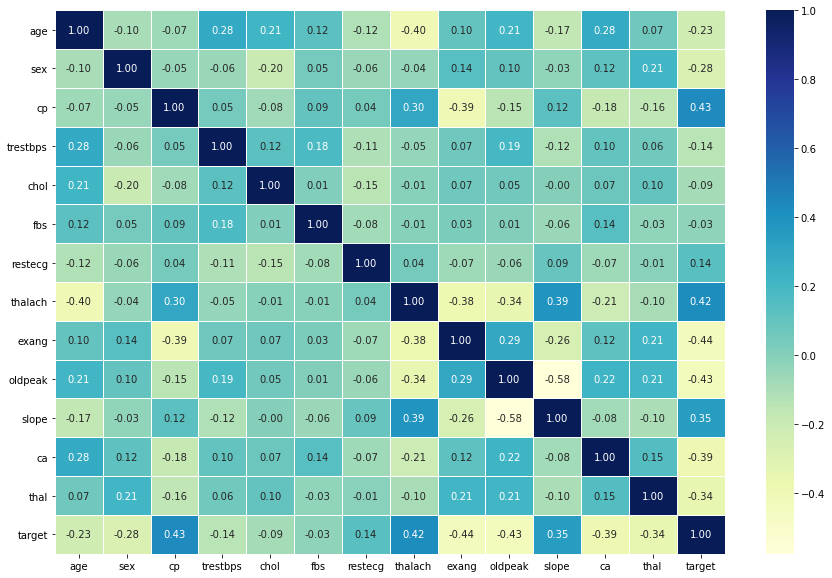

In [70]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

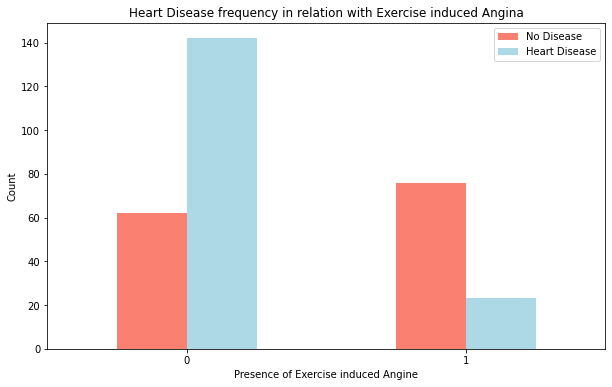

In [73]:
# 9. exang: exercise induced angina (1 = yes; 0 = no)

# Make the crosstab more visual
pd.crosstab(df.exang,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=("salmon", "lightblue"))

# Add some communication
plt.title("Heart Disease frequency in relation with Exercise induced Angina")
plt.xlabel("Presence of Exercise induced Angine")
plt.ylabel("Count")
plt.legend(["No Disease","Heart Disease"])
plt.xticks(rotation=0)

# Modelling

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
# Split data into x and y
x = df.drop("target",axis=1)
y = df["target"]

In [79]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [77]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [80]:
# Split data into train and test sets
np.random.seed()

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                   test_size=0.2)

In [81]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2


In [82]:
y_train, len(y_train)

(180    0
 102    1
 174    0
 183    0
 276    0
       ..
 224    0
 201    0
 91     1
 149    1
 164    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a meachine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K=nearest Neighbours Classifier
3. Random Forest Classifier

In [85]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-learn machine learning models
    x-train: training data (no labels)
    x_test: testing data(no labels)
    y_train: training labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [90]:
model_scores = fit_and_score(models=models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\balan\Documents\Data Analytics\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

### Model Comparison

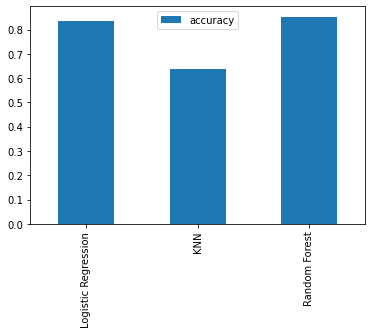

In [93]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we shoiuld based our next steps off. What should be done?

Let's look at the following:
* Hyperparameter tuning
        1. by hand
        2. RandomizedSearchCV
        3. GridSearchCV
* Feature importance
* Confusion matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under th curve

### Hyperparamter tuning(by hand)

In [139]:
# Let's tune KNN

train_scores =[]
test_scores =[]

# Create a list of different values for n_neighbors
neighbors = range(1, 30)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [140]:
train_scores

[1.0,
 0.8181818181818182,
 0.8016528925619835,
 0.7851239669421488,
 0.8057851239669421,
 0.768595041322314,
 0.7231404958677686,
 0.7479338842975206,
 0.7355371900826446,
 0.7396694214876033,
 0.7479338842975206,
 0.743801652892562,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.6942148760330579,
 0.6983471074380165,
 0.6983471074380165,
 0.6983471074380165,
 0.6776859504132231,
 0.6818181818181818,
 0.6900826446280992,
 0.6818181818181818,
 0.6735537190082644]

In [141]:
test_scores

[0.5081967213114754,
 0.4918032786885246,
 0.5901639344262295,
 0.5573770491803278,
 0.639344262295082,
 0.5737704918032787,
 0.6065573770491803,
 0.5901639344262295,
 0.6065573770491803,
 0.6229508196721312,
 0.5901639344262295,
 0.5901639344262295,
 0.5901639344262295,
 0.5901639344262295,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082,
 0.6885245901639344,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344]

Maximum KNN score on the test data: 70.49%


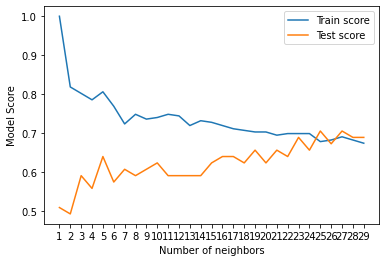

In [142]:
plt.plot(neighbors, train_scores, label ="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,30,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [124]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 5, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [117]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparamter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.97635144e-04, 8.85866790e-04, 2.63665090e-03,
       7.84759970e-03, 2.33572147e-02, 6.95192796e-02, 2.06913808e-01,
       6.15848211e-01, 1.83298071e+00, 5.45559478e+00, 1.62377674e+01,
       4.83293024e+01, 1.43844989e+02, 4.28133240e+02, 1.27427499e+03,
       3.79269019e+03, 1.12883789e+04, 3.35981829e+04, 1.00000000e+05]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [118]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 16.23776739188721}

In [119]:
rs_log_reg.score(x_test, y_test)

0.8360655737704918

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [125]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rf_grid,
                       cv=5,
                       n_iter=20,
                       verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [127]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [128]:
# Evaluate the randomized search RandomFOrestClassifier model
rs_rf.score(x_test,y_test)

0.8524590163934426

In [129]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

## Hyperparamter Tuning using GridSearchCV

Since our RandomForestClassifier provides the best scores so far, we'll try and improve them again using GridSearchCV

In [143]:
# Different hyperparamters for our logisticRegression model
rf_grid = {"n_estimators": np.arange(10,1000,100),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup grid hyperparameter search for LogisticRegression
gs_rf = GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparamter search model
gs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


KeyboardInterrupt: 

In [136]:
# Find the best hyperparameters
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 8,
 'n_estimators': 10}

In [137]:
# Evaluate the grid search RandomClassifier model
gs_rf.score(x_test, y_test)

0.8360655737704918

In [138]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible

To make comparisons and evluate our trained model, first we need to make predictions

In [145]:
# Make predictions with tuned model
y_preds = rs_rf.predict(x_test)

In [146]:
y_preds

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [147]:
y_test

148    1
113    1
282    0
94     1
137    1
      ..
108    1
50     1
4      1
54     1
3      1
Name: target, Length: 61, dtype: int64

C:\Users\balan\Documents\Data Analytics\heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


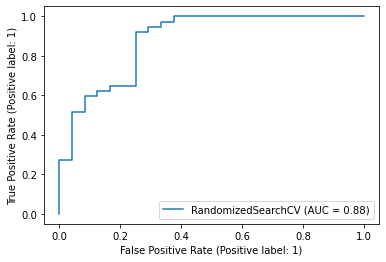

In [149]:
# Plot ROC cruve and calculate and calculate AUC metric
plot_roc_curve(rs_rf, x_test, y_test);

In [150]:
# Confustion matrix
print(confusion_matrix(y_test, y_preds))

[[18  6]
 [ 3 34]]


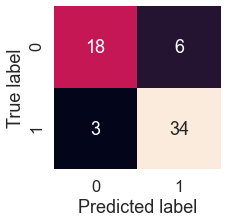

In [156]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC cruve, an AIC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [157]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.85      0.92      0.88        37

    accuracy                           0.85        61
   macro avg       0.85      0.83      0.84        61
weighted avg       0.85      0.85      0.85        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score'.

In [159]:
# Check best hyperparamters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [166]:
# Create a new classifier with best paramters
clf = RandomForestClassifier(n_estimators= 510,
                             min_samples_split= 18,
                             min_samples_leaf= 19,
                             max_depth= 5)

In [170]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.83606557, 0.85      , 0.76666667])

In [172]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8315300546448089

In [173]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8309563239710298

In [175]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8909090909090909

In [176]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8605981487134958

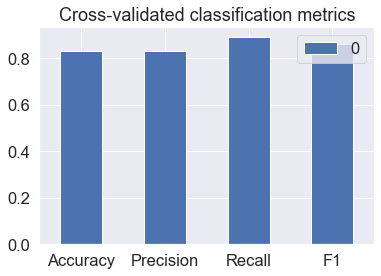

In [182]:
#Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index =[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics")
plt.xticks(rotation=0);

### Feature importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(Model Name) feature importance"

Let's find the feature importance for our RandomForestClassifier model.

In [186]:
# Fit an instance of RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 510,
                             min_samples_split= 18,
                             min_samples_leaf= 19,
                             max_depth= 5)

clf.fit(x_train, y_train);

In [197]:
# Determine feature importance values
importances = clf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

<function matplotlib.pyplot.show(close=None, block=None)>

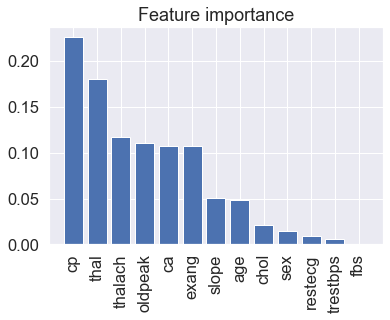

In [203]:
#Visualize the feature importance
plt.title("Feature importance")
plt.bar(range(x_train.shape[1]),
        importances[sorted_indices],
        align="center")
plt.xticks(range(x_train.shape[1]),
           x_train.columns[sorted_indices],
           rotation=90)
plt.show

In [209]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


cp: chest pain type
* 0 typical angina: chest pain related decrease blood supply to the heart
* 1 atypical angina: chest pain not related to heart
* 2 non-anginal pain: typically esphageal spasms(non heart related)
* 3 asymptomatic: chest pain not showing signes of disease

In [210]:
pd.crosstab(df["thal"], df["target"])

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


thal: 
* 3 = normal; 
* 6 = fixed defect; 
* 7 = reversable defect

# 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like Catboost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric), how would you export it and share it with others?